# Study of the Phase transition in the 2nn Ising Model by using DMRG

#### Imports

In [33]:
import matplotlib.pyplot as plt
import numpy as np

##### Data

In [ ]:
hs=np.linspace(1,7.5,14)
ls=[256,320,384,448]

z_l=[]
corr_l=[]
for l in ls: 
    z={}
    corr={}
    for h in hs:
        print(l,h)
        data = np.load(f"data/check_the_2nn_phase_transition/051222/test_periodic_{l}_l_{h}_h_100_n.npz")
        z[h] = data["density"]
        corr[h] = data["correlation"]
        
    z_l.append(z)
    corr_l.append(corr)

 #### Plots

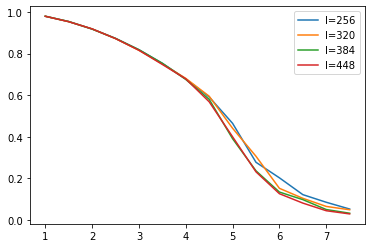

In [43]:
for i in range(len(ls)):
    chi=[]
    for h in hs:
        chi.append(np.average(corr_l[i][h]))

    plt.plot(hs,chi,label=f'l={ls[i]}')
plt.legend()
plt.show()

#### Critical behaviour

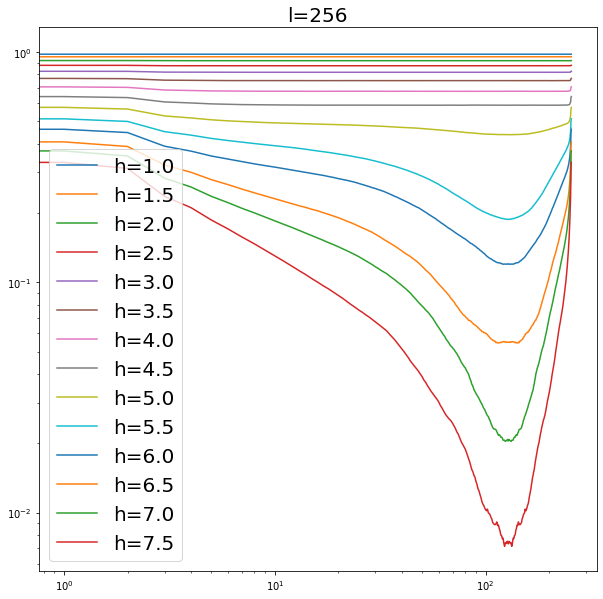

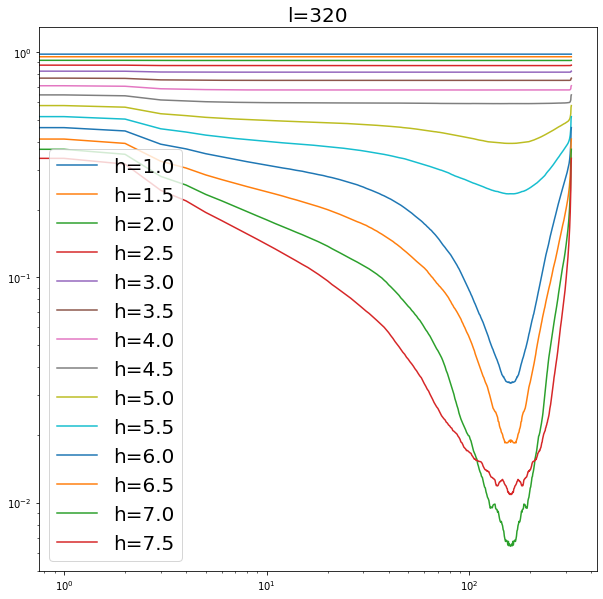

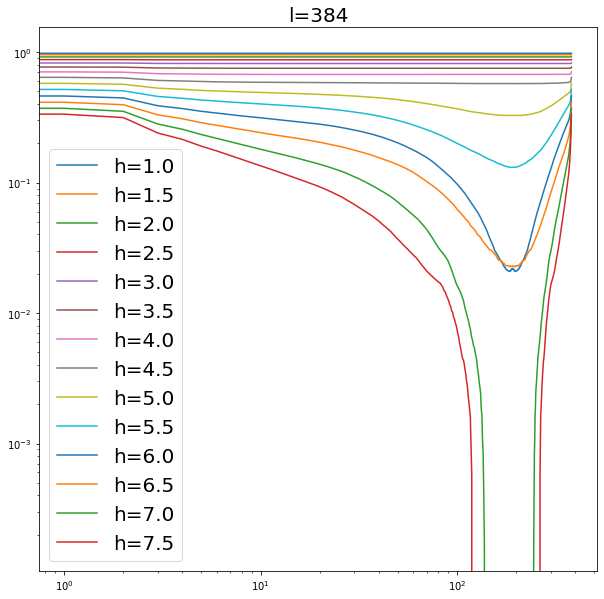

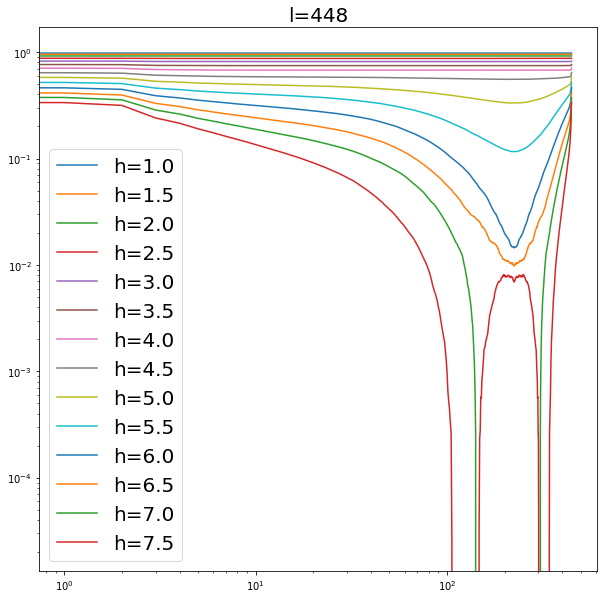

In [44]:
for i in range(len(ls)):
    plt.figure(figsize=(10,10))
    for h in hs:
        idx=np.arange(ls[i])
        xx=corr_l[i][h]
        for r in range(ls[i]):
            m = xx[:, idx, (idx + r) % ls[i]]
            if r == 0:
                ms = m.reshape(-1, 1, ls[i])
            else:
                ms = np.append(ms, m.reshape(-1, 1, ls[i]), axis=-2)
        ms=np.average(ms,axis=0)
        ms=np.average(ms,axis=-1)
        plt.plot(idx,ms,label=f'h={h}')
    
    plt.legend(fontsize=20)
    plt.title(f'l={ls[i]}',fontsize=20)
    plt.loglog()
    plt.show()
                

## Study the Binder Cumulant

#### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.utils_sparse_diag import binder_cumulant_computation

#### Data

KeyError: (12, 8.0)

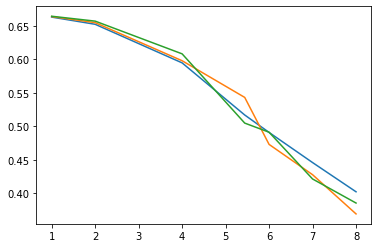

In [32]:
data=np.load('data/check_the_2nn_phase_transition/151222/binder_cumulant_range_h_7_range_l_6-16.npz',allow_pickle=True)
u=data['u']
h_max=data['hmax']
ls=data['ls']

u=u.item()

for l in ls:
    plt.plot(h_max,[np.average(u[(l,h)]) for h in h_max])
plt.show()

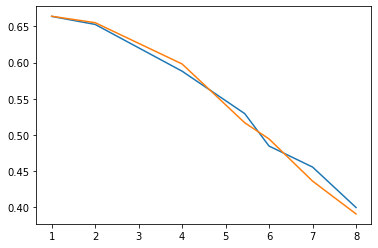

In [6]:
for l in ls:
    plt.plot(h_max,[np.average(u[(l,h)]) for h in h_max])
plt.show()
    